# Analysis of SQuAD dataset

In [1]:
from question_answering.paths import extractive_qa_paths
from question_answering.utils import extractive_qa_utils, core_qa_utils
from transformers import AutoTokenizer

In [2]:
# Load SQuAD dataset
df_train, df_val, df_test = core_qa_utils.load_train_val_test_datasets(
    extractive_qa_paths.squad_dataset_dir
)

train_dataset, val_dataset, test_dataset = core_qa_utils.convert_dataframes_to_datasets(
    [df_train, df_val, df_test]
)

# Maximum number of tokens in any sample across datasets for various tokenizers

In [3]:
# Check the maximum nuber of tokens in any sample across datasets
def tokenize_sample(sample, tokenizer, max_tokens=None, padding=False):
    question = sample["question"].strip()
    context = sample["context"].strip()

    return tokenizer(question, context, max_length=max_tokens, padding=padding)

## Bert Base Uncased

In [4]:
bert_base_uncased_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [5]:
tokenized_train_dataset = train_dataset.map(lambda row: tokenize_sample(row, bert_base_uncased_tokenizer))
tokenized_val_dataset = val_dataset.map(lambda row: tokenize_sample(row, bert_base_uncased_tokenizer))
tokenized_test_dataset = test_dataset.map(lambda row: tokenize_sample(row, bert_base_uncased_tokenizer))

print(
    "Max number of tokens in tokenized train dataset: ",
    len(max(tokenized_train_dataset["input_ids"], key=len)),
)
print(
    "Max number of tokens in tokenized val dataset: ",
    len(max(tokenized_val_dataset["input_ids"], key=len)),
)
print(
    "Max number of tokens in tokenized test dataset: ",
    len(max(tokenized_test_dataset["input_ids"], key=len)),
)

Map:   0%|          | 0/68716 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/14724 [00:00<?, ? examples/s]

Map:   0%|          | 0/14725 [00:00<?, ? examples/s]

Max number of tokens in tokenized train dataset:  870
Max number of tokens in tokenized val dataset:  866
Max number of tokens in tokenized test dataset:  817


## Bert Base Cased

In [7]:
bert_base_cased_tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [8]:
tokenized_train_dataset = train_dataset.map(lambda row: tokenize_sample(row, bert_base_cased_tokenizer))
tokenized_val_dataset = val_dataset.map(lambda row: tokenize_sample(row, bert_base_cased_tokenizer))
tokenized_test_dataset = test_dataset.map(lambda row: tokenize_sample(row, bert_base_cased_tokenizer))

print(
    "Max number of tokens in tokenized train dataset: ",
    len(max(tokenized_train_dataset["input_ids"], key=len)),
)
print(
    "Max number of tokens in tokenized val dataset: ",
    len(max(tokenized_val_dataset["input_ids"], key=len)),
)
print(
    "Max number of tokens in tokenized test dataset: ",
    len(max(tokenized_test_dataset["input_ids"], key=len)),
)

Map:   0%|          | 0/68716 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/14724 [00:00<?, ? examples/s]

Map:   0%|          | 0/14725 [00:00<?, ? examples/s]

Max number of tokens in tokenized train dataset:  882
Max number of tokens in tokenized val dataset:  879
Max number of tokens in tokenized test dataset:  831


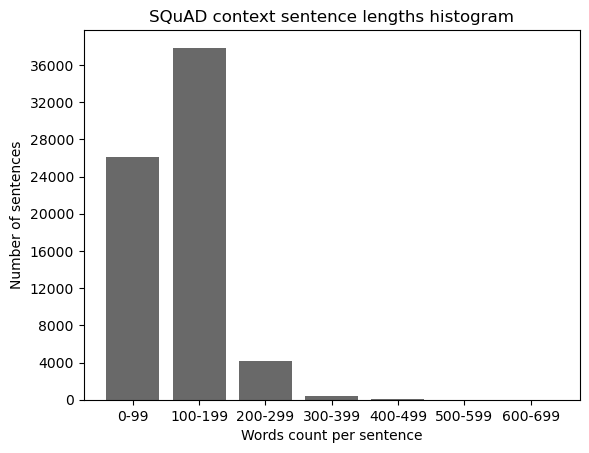

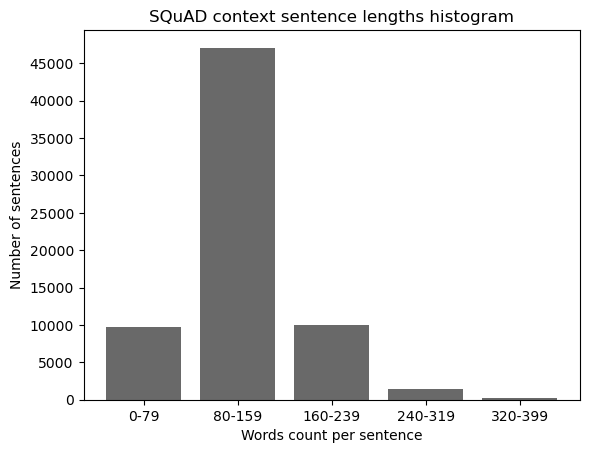

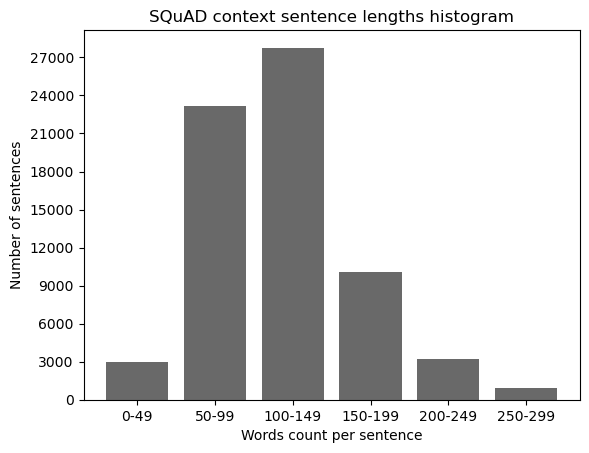

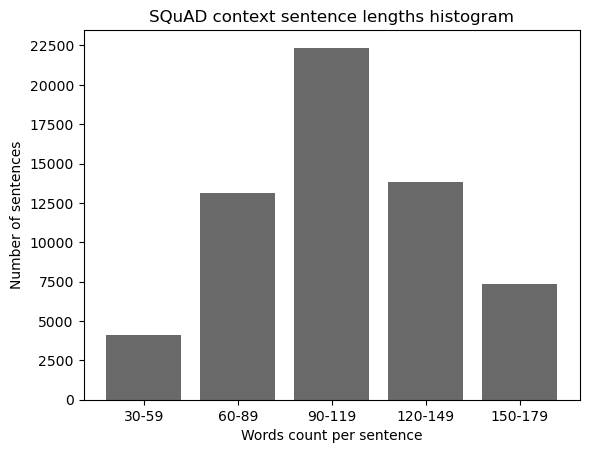

In [9]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["context"],
    figure_path=extractive_qa_paths.general_figures_dir / "train_squad_context_sentence_lengths_histogram_0_700_100.png",
    figure_title="SQuAD context sentence lengths histogram",
    min_threshold=0,
    max_threshold=700,
    divider=100
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["context"],
    figure_path=extractive_qa_paths.general_figures_dir / "train_squad_context_sentence_lengths_histogram_0_400_80.png",
    figure_title="SQuAD context sentence lengths histogram",
    min_threshold=0,
    max_threshold=400,
    divider=80
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["context"],
    figure_path=extractive_qa_paths.general_figures_dir / "train_squad_context_sentence_lengths_histogram_0_300_50.png",
    figure_title="SQuAD context sentence lengths histogram",
    min_threshold=0,
    max_threshold=300,
    divider=50
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["context"],
    figure_path=extractive_qa_paths.general_figures_dir / "train_squad_context_sentence_lengths_histogram_30_180_30.png",
    figure_title="SQuAD context sentence lengths histogram",
    min_threshold=30,
    max_threshold=180,
    divider=30
)

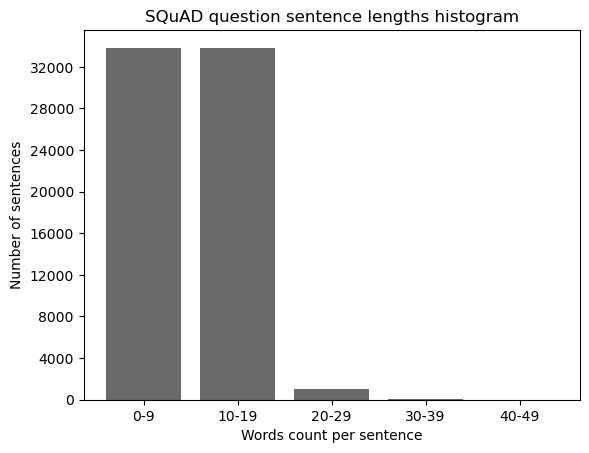

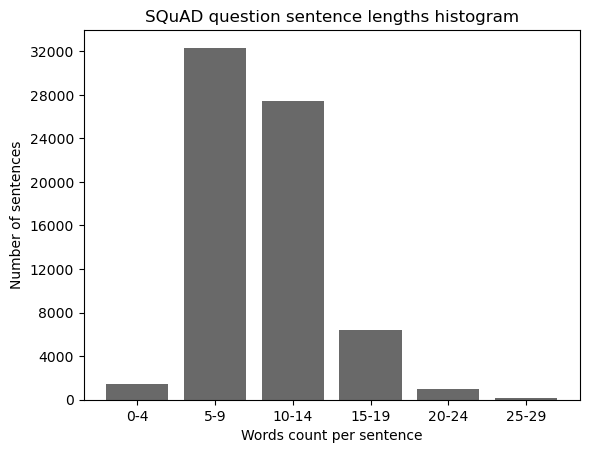

In [12]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["question"],
    figure_path=extractive_qa_paths.general_figures_dir / "train_squad_question_sentence_lengths_histogram_0_50_10.png",
    figure_title="SQuAD question sentence lengths histogram",
    min_threshold=0,
    max_threshold=50,
    divider=10
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=train_dataset["question"],
    figure_path=extractive_qa_paths.general_figures_dir / "train_squad_question_sentence_lengths_histogram_0_30_5.png",
    figure_title="SQuAD question sentence lengths histogram",
    min_threshold=0,
    max_threshold=30,
    divider=5
)